In [1]:
#!pip install -U spacy

In [2]:
#!python -m spacy download en_core_web_sm

In [3]:
import pandas as pd
import numpy as np 
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer as stemmer
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re

from collections import Counter 
import spacy
from IPython.display import clear_output

from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
#!pip install wordCloud

In [5]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [6]:
df=pd.read_csv("Suman_webscrapping_Amazon.csv")

In [7]:
df.head()

reviews  \
0  I expected much from this mobile but still for Samsung in this price this phone is surprise. I Got Android Pie with One UI 1.5 along with adaptive fast charging adaptor out of the box. Let me share with you my experience;PROS;✓✓ Display is Super AMOLED, outdoor display brightness is better than M30,✓✓ Ultra-wide camera is improved and captures 123 degree✓✓ Battery is bigger enough to be compared with a battery of MacBook Pro,✓✓ Phone is lightweight as 188gm while holding a bigger battery with capacity of 6000mAh,✓✓ Triple camera setup includes a 48mp Samsung GM1 sensor, an 8mp ultra wide angle lens and a 5mp depth. Front camera is also 16mp,✓✓ It does not have EIS but Super Steady mode is impressive. It can record 4K videos, Super Slow-Mo and Hyper lapse,✓✓ Type-C port along with a 3.5mm headphone jack provided,✓✓ Exynos 9611 octa-core chipset based on a 10nm process. Same processor has been used on Samsung A50S which is being sold at higher price by same brand. Performance is smooth and competent for playing games because Exynos 9611 is better than the Snapdragon 665 as per my experience,CONS;✓✓ Body is made of plastic which makes it quality inferior and does not give it a premium look like other Samsung phones,✓✓ Front screen and Back glass are not protected like Corning Gorrila Glass so beware of losing it. (If you have enrolled for Amazon 1 year screen replacement program then fine otherwise AMOLED display replacement can cost you minimum Rs.6k)✓✓ Processor is power consuming and Battery performance is not upto expectation, even its same almost like M30 as I compared with my brothers phone,✓✓ 15W fast charging is slow for this giant battery,✓✓ Small size apertures (48mp cam with an f/2.0 aperture, 5mp with an f/2.2 and 8mp with f/2.2.) capture less light through it. Result average night mode and less blurred bokeh,✓✓ Front cam selfie lack detailing and seems smoother and Super steady mode does not work on it,✓✓ No inscreen fingerprint sensor like Mi A3 which is earlier launched in lower range,✓✓ NFC is no future technology and missing it in a latest phone does make it lack at some point✓✓ Face unlock is not faster and effective✓✓ Slo-mo video Flickers in artificial lighteningFinal verdict;As per my experience if you want to stuck with Samsung then you can go for Samsung M30 which will give you better battery backup with lighter weight and less mAh and better image quality in lesser megapixels and bigger Aperture.And if you can go with another brand then Xiaomi A3 is an option which is more economical with better camera, inscreen fingerprint sensor and display protected by Corning Gorilla glass.You can make your decision on this product by reading my review. Do hit HELPFUL if you find it helpful to keep me motivated for writing detailed reviews of products I buy and do not forget to follow me for getting access to great deals on your favorite products from my Amazon storefront\n   
1  camera , battery , quality , grip ... and as i purchased the device in sale , i get 1000 cashback from the amazon , orded on today at 12 pm , and get the device on the same day at 2 pm .Thankyou amazon .\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [8]:
df.shape

(8000, 2)

In [9]:
def clean(row):
    s=row['reviews']
    stop=stopwords.words('english')
    p=string.punctuation
    ps=stemmer()
    s=s.lower()
    a_clean=[i for i in s if i not in p]
    a__clean=''.join(a_clean)
    c=a__clean.split()
    clean=[i for i in c if i not in stop]
    n_stem=[ps.stem(i) for i in clean]
    d=' '.join(n_stem)
    cleaned=re.sub(' +',' ',d)
    return cleaned

In [10]:
df['cleaned_review']=df.apply(lambda row:clean(row),axis=1)

In [11]:
df.head()

reviews  \
0  I expected much from this mobile but still for Samsung in this price this phone is surprise. I Got Android Pie with One UI 1.5 along with adaptive fast charging adaptor out of the box. Let me share with you my experience;PROS;✓✓ Display is Super AMOLED, outdoor display brightness is better than M30,✓✓ Ultra-wide camera is improved and captures 123 degree✓✓ Battery is bigger enough to be compared with a battery of MacBook Pro,✓✓ Phone is lightweight as 188gm while holding a bigger battery with capacity of 6000mAh,✓✓ Triple camera setup includes a 48mp Samsung GM1 sensor, an 8mp ultra wide angle lens and a 5mp depth. Front camera is also 16mp,✓✓ It does not have EIS but Super Steady mode is impressive. It can record 4K videos, Super Slow-Mo and Hyper lapse,✓✓ Type-C port along with a 3.5mm headphone jack provided,✓✓ Exynos 9611 octa-core chipset based on a 10nm process. Same processor has been used on Samsung A50S which is being sold at higher price by same brand. Performance is smooth and competent for playing games because Exynos 9611 is better than the Snapdragon 665 as per my experience,CONS;✓✓ Body is made of plastic which makes it quality inferior and does not give it a premium look like other Samsung phones,✓✓ Front screen and Back glass are not protected like Corning Gorrila Glass so beware of losing it. (If you have enrolled for Amazon 1 year screen replacement program then fine otherwise AMOLED display replacement can cost you minimum Rs.6k)✓✓ Processor is power consuming and Battery performance is not upto expectation, even its same almost like M30 as I compared with my brothers phone,✓✓ 15W fast charging is slow for this giant battery,✓✓ Small size apertures (48mp cam with an f/2.0 aperture, 5mp with an f/2.2 and 8mp with f/2.2.) capture less light through it. Result average night mode and less blurred bokeh,✓✓ Front cam selfie lack detailing and seems smoother and Super steady mode does not work on it,✓✓ No inscreen fingerprint sensor like Mi A3 which is earlier launched in lower range,✓✓ NFC is no future technology and missing it in a latest phone does make it lack at some point✓✓ Face unlock is not faster and effective✓✓ Slo-mo video Flickers in artificial lighteningFinal verdict;As per my experience if you want to stuck with Samsung then you can go for Samsung M30 which will give you better battery backup with lighter weight and less mAh and better image quality in lesser megapixels and bigger Aperture.And if you can go with another brand then Xiaomi A3 is an option which is more economical with better camera, inscreen fingerprint sensor and display protected by Corning Gorilla glass.You can make your decision on this product by reading my review. Do hit HELPFUL if you find it helpful to keep me motivated for writing detailed reviews of products I buy and do not forget to follow me for getting access to great deals on your favorite products from my Amazon storefront\n   
1  camera , battery , quality , grip ... and as i purchased the device in sale , i get 1000 cashback from the amazon , orded on today at 12 pm , and get the device on the same day at 2 pm .Thankyou amazon .\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

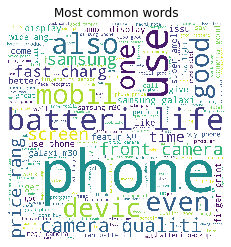

In [12]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, stopwords=set(stopwords.words('english')), background_color='white')
wordcloud = wordcloud.generate(' '.join(df['cleaned_review'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words")
plt.axis('off')
plt.show()

### Battery Life, Phone, Even, good are some of the words which are popping out the most from all the reviews after cleaning the reviews 

In [13]:
df['Ratings']

0       4.0 out of 5 stars
1       5.0 out of 5 stars
2       5.0 out of 5 stars
3       3.0 out of 5 stars
4       5.0 out of 5 stars
               ...        
7995    4.0 out of 5 stars
7996    2.0 out of 5 stars
7997    4.0 out of 5 stars
7998    1.0 out of 5 stars
7999    2.0 out of 5 stars
Name: Ratings, Length: 8000, dtype: object

In [14]:
def rat(row):
    string=row['Ratings']
    string.split()
    return float(string[:3]) ###Spling upto 3 characters from the rating part

In [15]:
df['Ratings']=df.apply(lambda row:rat(row),axis=1)


In [16]:
df.head()

reviews  \
0  I expected much from this mobile but still for Samsung in this price this phone is surprise. I Got Android Pie with One UI 1.5 along with adaptive fast charging adaptor out of the box. Let me share with you my experience;PROS;✓✓ Display is Super AMOLED, outdoor display brightness is better than M30,✓✓ Ultra-wide camera is improved and captures 123 degree✓✓ Battery is bigger enough to be compared with a battery of MacBook Pro,✓✓ Phone is lightweight as 188gm while holding a bigger battery with capacity of 6000mAh,✓✓ Triple camera setup includes a 48mp Samsung GM1 sensor, an 8mp ultra wide angle lens and a 5mp depth. Front camera is also 16mp,✓✓ It does not have EIS but Super Steady mode is impressive. It can record 4K videos, Super Slow-Mo and Hyper lapse,✓✓ Type-C port along with a 3.5mm headphone jack provided,✓✓ Exynos 9611 octa-core chipset based on a 10nm process. Same processor has been used on Samsung A50S which is being sold at higher price by same brand. Performance is smooth and competent for playing games because Exynos 9611 is better than the Snapdragon 665 as per my experience,CONS;✓✓ Body is made of plastic which makes it quality inferior and does not give it a premium look like other Samsung phones,✓✓ Front screen and Back glass are not protected like Corning Gorrila Glass so beware of losing it. (If you have enrolled for Amazon 1 year screen replacement program then fine otherwise AMOLED display replacement can cost you minimum Rs.6k)✓✓ Processor is power consuming and Battery performance is not upto expectation, even its same almost like M30 as I compared with my brothers phone,✓✓ 15W fast charging is slow for this giant battery,✓✓ Small size apertures (48mp cam with an f/2.0 aperture, 5mp with an f/2.2 and 8mp with f/2.2.) capture less light through it. Result average night mode and less blurred bokeh,✓✓ Front cam selfie lack detailing and seems smoother and Super steady mode does not work on it,✓✓ No inscreen fingerprint sensor like Mi A3 which is earlier launched in lower range,✓✓ NFC is no future technology and missing it in a latest phone does make it lack at some point✓✓ Face unlock is not faster and effective✓✓ Slo-mo video Flickers in artificial lighteningFinal verdict;As per my experience if you want to stuck with Samsung then you can go for Samsung M30 which will give you better battery backup with lighter weight and less mAh and better image quality in lesser megapixels and bigger Aperture.And if you can go with another brand then Xiaomi A3 is an option which is more economical with better camera, inscreen fingerprint sensor and display protected by Corning Gorilla glass.You can make your decision on this product by reading my review. Do hit HELPFUL if you find it helpful to keep me motivated for writing detailed reviews of products I buy and do not forget to follow me for getting access to great deals on your favorite products from my Amazon storefront\n   
1  camera , battery , quality , grip ... and as i purchased the device in sale , i get 1000 cashback from the amazon , orded on today at 12 pm , and get the device on the same day at 2 pm .Thankyou amazon .\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [18]:
def Categorization(row):
    if row['Ratings']<2:
        return "negative"
    elif row['Ratings']>2:
        return "positive"
    else:
        return "neutral"
    
### Adding a category based on the ratings

In [19]:
df['Category']=df.apply(lambda row:Categorization(row),axis=1)

In [20]:
df.head()

reviews  \
0  I expected much from this mobile but still for Samsung in this price this phone is surprise. I Got Android Pie with One UI 1.5 along with adaptive fast charging adaptor out of the box. Let me share with you my experience;PROS;✓✓ Display is Super AMOLED, outdoor display brightness is better than M30,✓✓ Ultra-wide camera is improved and captures 123 degree✓✓ Battery is bigger enough to be compared with a battery of MacBook Pro,✓✓ Phone is lightweight as 188gm while holding a bigger battery with capacity of 6000mAh,✓✓ Triple camera setup includes a 48mp Samsung GM1 sensor, an 8mp ultra wide angle lens and a 5mp depth. Front camera is also 16mp,✓✓ It does not have EIS but Super Steady mode is impressive. It can record 4K videos, Super Slow-Mo and Hyper lapse,✓✓ Type-C port along with a 3.5mm headphone jack provided,✓✓ Exynos 9611 octa-core chipset based on a 10nm process. Same processor has been used on Samsung A50S which is being sold at higher price by same brand. Performance is smooth and competent for playing games because Exynos 9611 is better than the Snapdragon 665 as per my experience,CONS;✓✓ Body is made of plastic which makes it quality inferior and does not give it a premium look like other Samsung phones,✓✓ Front screen and Back glass are not protected like Corning Gorrila Glass so beware of losing it. (If you have enrolled for Amazon 1 year screen replacement program then fine otherwise AMOLED display replacement can cost you minimum Rs.6k)✓✓ Processor is power consuming and Battery performance is not upto expectation, even its same almost like M30 as I compared with my brothers phone,✓✓ 15W fast charging is slow for this giant battery,✓✓ Small size apertures (48mp cam with an f/2.0 aperture, 5mp with an f/2.2 and 8mp with f/2.2.) capture less light through it. Result average night mode and less blurred bokeh,✓✓ Front cam selfie lack detailing and seems smoother and Super steady mode does not work on it,✓✓ No inscreen fingerprint sensor like Mi A3 which is earlier launched in lower range,✓✓ NFC is no future technology and missing it in a latest phone does make it lack at some point✓✓ Face unlock is not faster and effective✓✓ Slo-mo video Flickers in artificial lighteningFinal verdict;As per my experience if you want to stuck with Samsung then you can go for Samsung M30 which will give you better battery backup with lighter weight and less mAh and better image quality in lesser megapixels and bigger Aperture.And if you can go with another brand then Xiaomi A3 is an option which is more economical with better camera, inscreen fingerprint sensor and display protected by Corning Gorilla glass.You can make your decision on this product by reading my review. Do hit HELPFUL if you find it helpful to keep me motivated for writing detailed reviews of products I buy and do not forget to follow me for getting access to great deals on your favorite products from my Amazon storefront\n   
1  camera , battery , quality , grip ... and as i purchased the device in sale , i get 1000 cashback from the amazon , orded on today at 12 pm , and get the device on the same day at 2 pm .Thankyou amazon .\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

Text(0.5, 1.0, 'Distribution of Reviews Category')

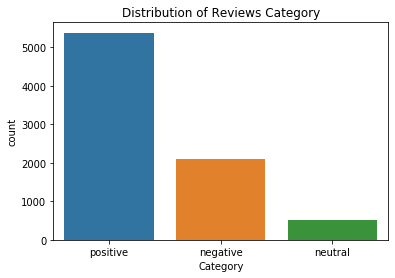

In [21]:
sns.countplot(df['Category']).set_title("Distribution of Reviews Category")

### Positive reviews are popping out more, i.e., Rating more than 2 have the maximum number and then negative and then neutral

In [22]:
positive_reviews=df.loc[df['Category']=='positive','cleaned_review'].tolist()
negative_reviews=df.loc[df['Category']=='negative','cleaned_review'].tolist()

In [23]:
len(positive_reviews)

5380

In [24]:
len(negative_reviews)

2100

In [25]:
def commonwords(review,top=30):
    reviews="".join(review)
    tokenised_reviews=reviews.split(" ")
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(top)

In [26]:
top_30_positive_review_words=commonwords(positive_reviews,30)

In [27]:
top_30_positive_review_words ## phone, good,camera are top 3 postive words present in the positive reviews

[('phone', 8725),
 ('good', 5481),
 ('camera', 5254),
 ('batteri', 4345),
 ('samsung', 4138),
 ('use', 3150),
 ('display', 2830),
 ('qualiti', 2434),
 ('also', 2253),
 ('price', 2224),
 ('day', 2133),
 ('like', 2099),
 ('one', 2009),
 ('screen', 1994),
 ('look', 1917),
 ('charg', 1909),
 ('great', 1743),
 ('fast', 1672),
 ('featur', 1571),
 ('mobil', 1570),
 ('get', 1484),
 ('m30', 1395),
 ('best', 1344),
 ('better', 1289),
 ('game', 1284),
 ('life', 1268),
 ('realli', 1260),
 ('work', 1257),
 ('time', 1213),
 ('perform', 1191)]

In [28]:
top_30_negative_review_words=commonwords(negative_reviews,30)

## phone, samsung, camera are top 3 negative words which are popping out most, so, "phone" is the common word which is popping out common in both positive and negative reviews which anyways doesn't make sense. But if we see the 2nd word which is popping out most in Negative reviews is "samsung" which means people are directly blaming the company not any feature. 3rd word which is popping out most in negative review is Camera, so people are not satisfied with the camera performance.

In [29]:
top_30_negative_review_words 

[('phone', 2320),
 ('samsung', 1509),
 ('camera', 1177),
 ('qualiti', 915),
 ('amazon', 825),
 ('buy', 745),
 ('mobil', 739),
 ('use', 705),
 ('batteri', 693),
 ('product', 673),
 ('dont', 617),
 ('good', 610),
 ('work', 571),
 ('also', 569),
 ('issu', 568),
 ('like', 560),
 ('even', 558),
 ('get', 547),
 ('day', 547),
 ('call', 540),
 ('replac', 529),
 ('screen', 489),
 ('return', 486),
 ('servic', 460),
 ('time', 449),
 ('one', 411),
 ('charg', 389),
 ('custom', 381),
 ('worst', 378),
 ('problem', 378)]

In [30]:
neg_words=[val[0] for val in top_30_negative_review_words]
pos_words=[val[0] for val in top_30_positive_review_words]

set(neg_words) - set(pos_words)

{'amazon',
 'buy',
 'call',
 'custom',
 'dont',
 'even',
 'issu',
 'problem',
 'product',
 'replac',
 'return',
 'servic',
 'worst'}

In [31]:
set(pos_words) - set(neg_words)

{'best',
 'better',
 'display',
 'fast',
 'featur',
 'game',
 'great',
 'life',
 'look',
 'm30',
 'perform',
 'price',
 'realli'}

In [32]:
def plotCommonWords(reviews,top=50,title="Positive Review",color="blue",axis=None):
    top_words=commonwords(reviews,top=top)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(top))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(top))


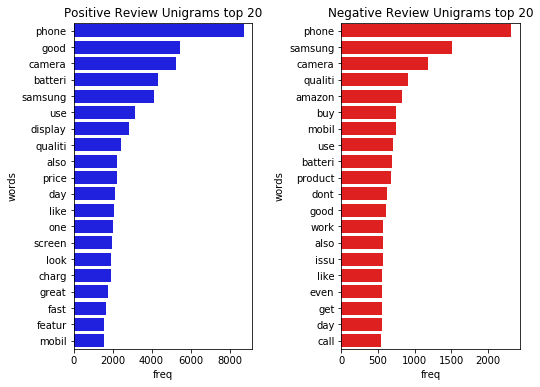

In [34]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotCommonWords(positive_reviews,20,"Positive Review Unigrams",axis=ax[0])

plotCommonWords(negative_reviews,20,"Negative Review Unigrams",color="red",axis=ax[1])

In [35]:
def generateNGram(text,n=2):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [36]:
positive_reviews_bigrams=[" ".join(generateNGram(review)) for review in positive_reviews]
negative_reviews_bigrams=[" ".join(generateNGram(review)) for review in negative_reviews]

In [37]:
top_20_positive_bigrams=commonwords(positive_reviews_bigrams,top=20)
top_20_positive_bigrams

[('batteri_life', 949),
 ('fast_charg', 539),
 ('price_rang', 502),
 ('front_camera', 484),
 ('super_amol', 439),
 ('camera_qualiti', 434),
 ('wide_angl', 430),
 ('amol_display', 407),
 ('galaxi_m30', 384),
 ('batteri_backup', 375),
 ('use_phone', 360),
 ('low_light', 355),
 ('finger_print', 351),
 ('mah_batteri', 349),
 ('rear_camera', 345),
 ('fingerprint_sensor', 341),
 ('camera_good', 341),
 ('samsung_galaxi', 338),
 ('5000_mah', 312),
 ('2_day', 302)]

In [38]:
top_20_negative_bigrams=commonwords(negative_reviews_bigrams,top=20)

### In bigrams, people are very much satisfied with battery life but are not satisfied with the camera quality(which is also reflected in the unigrams) 

In [39]:
top_20_negative_bigrams

[('dont_buy', 207),
 ('camera_qualiti', 199),
 ('buy_phone', 153),
 ('custom_care', 128),
 ('samsung_m30', 112),
 ('front_camera', 111),
 ('samsung_galaxi', 109),
 ('redmi_note', 100),
 ('wast_money', 90),
 ('batteri_life', 85),
 ('custom_servic', 84),
 ('servic_center', 81),
 ('use_phone', 73),
 ('48_mp', 70),
 ('samsung_phone', 70),
 ('pleas_dont', 66),
 ('batteri_drain', 65),
 ('buy_samsung', 65),
 ('servic_centr', 63),
 ('finger_print', 61)]

In [40]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1) #Adjusts the space between the two plots
plotCommonWords(positive_reviews_bigrams,50,"Positive Review Bigrams",axis=ax[0])

plotCommonWords(negative_reviews_bigrams,50,"Negative Review Bigrams",color="red",axis=ax[1])

In [41]:
def TriGram(text,n=5):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [42]:
positive_reviews_trigrams=[" ".join(TriGram(review)) for review in positive_reviews]
negative_reviews_trigrams=[" ".join(TriGram(review)) for review in negative_reviews]


In [43]:
top_20_positive_trigrams=commonwords(positive_reviews_trigrams,top=20)
top_20_positive_trigrams

[('game_like_pubg_asphalt_9', 24),
 ('switch_onand_2_hour_continu', 22),
 ('onand_2_hour_continu_use', 22),
 ('within_24_hourslook_awesomebatteri_49', 17),
 ('24_hourslook_awesomebatteri_49_switch', 17),
 ('hourslook_awesomebatteri_49_switch_onand', 17),
 ('awesomebatteri_49_switch_onand_2', 17),
 ('49_switch_onand_2_hour', 17),
 ('2_hour_continu_use_42', 17),
 ('hour_continu_use_42_nowcamera', 17),
 ('continu_use_42_nowcamera_awesomesound', 17),
 ('use_42_nowcamera_awesomesound_louddisplay', 17),
 ('42_nowcamera_awesomesound_louddisplay_amazingmin', 17),
 ('nowcamera_awesomesound_louddisplay_amazingmin_opal', 17),
 ('awesomesound_louddisplay_amazingmin_opal_black', 17),
 ('55perform_55display_55batteri_55phone_look', 15),
 ('slow_motion_super_slow_motion', 15),
 ('super_amol_display_5000_mah', 14),
 ('4gb_ram_64gb_intern_memori', 14),
 ('5000_mah_batteri_fast_charg', 14)]

In [44]:
top_20_negative_trigrams=commonwords(negative_reviews_trigrams,top=20)
top_20_negative_trigrams

[('recharg_rs_198_rs_299', 20),
 ('poor_disappoint_worth_exagger_specif', 15),
 ('disappoint_worth_exagger_specif_paper', 15),
 ('worth_exagger_specif_paper_camerabatterytouch', 15),
 ('perform_recharg_rs_198_rs', 15),
 ('redmi_note_7_pro_realm', 15),
 ('note_7_pro_realm_5', 15),
 ('7_pro_realm_5_pro', 15),
 ('get_heat_upphon_rear_camera', 10),
 ('heat_upphon_rear_camera_qualiti', 10),
 ('upphon_rear_camera_qualiti_poorspeak', 10),
 ('rear_camera_qualiti_poorspeak_also', 10),
 ('camera_qualiti_poorspeak_also_good', 10),
 ('qualiti_poorspeak_also_good_compar', 10),
 ('poorspeak_also_good_compar_pricephon', 10),
 ('also_good_compar_pricephon_bodi', 10),
 ('good_qualiti_mark_upto_48mp', 10),
 ('front_camera_say_16_mp', 10),
 ('camera_say_16_mp_even', 10),
 ('say_16_mp_even_2', 10)]

In [45]:
reviews=[review for review in df.cleaned_review]

In [46]:
vectorizer = TfidfVectorizer()
tfidf_model=vectorizer.fit_transform(reviews)

In [47]:
pd.DataFrame(tfidf_model.toarray(), columns = vectorizer.get_feature_names())


001   01  0100  01042019   02  0200  0200kwg  020219  02022019  \
0     0.0  0.0  0.0   0.0       0.0  0.0   0.0      0.0     0.0        
1     0.0  0.0  0.0   0.0       0.0  0.0   0.0      0.0     0.0        
2     0.0  0.0  0.0   0.0       0.0  0.0   0.0      0.0     0.0        
3     0.0  0.0  0.0   0.0       0.0  0.0   0.0      0.0     0.0        
4     0.0  0.0  0.0   0.0       0.0  0.0   0.0      0.0     0.0        
...   ...  ...  ...   ...       ...  ...   ...      ...     ...        
7995  0.0  0.0  0.0   0.0       0.0  0.0   0.0      0.0     0.0        
7996  0.0  0.0  0.0   0.0       0.0  0.0   0.0      0.0     0.0        
7997  0.0  0.0  0.0   0.0       0.0  0.0   0.0      0.0     0.0        
7998  0.0  0.0  0.0   0.0       0.0  0.0   0.0      0.0     0.0        
7999  0.0  0.0  0.0   0.0       0.0  0.0   0.0      0.0     0.0        

      02102019  024wkg   03  0332fast  0335  03apr   04  0413  043after   05  \
0     0.0       0.0     0.0  0.0       0.0   0.0    0.0  0.0   0.0       0.0   
1     0.0       0.0     0.0  0.0       0.0   0.0    0.0  0.0   0.0       0.0   
2     0.0       0.0     0.0  0.0       0.0   0.0    0.0  0.0   0.0       0.0   
3     0.0       0.0     0.0  0.0       0.0   0.0    0.0  0.0   0.0       0.0   
4     0.0       0.0     0.0  0.0       0.0   0.0    0.0  0.0   0.0       0.0   
...   ...       ...     ...  ...       ...   ...    ...  ...   ...       ...   
7995  0.0       0.0     0.0  0.0       0.0   0.0    0.0  0.0   0.0       0.0   
7996  0.0       0.0     0.0  0.0       0.0   0.0    0.0  0.0   0.0       0.0   
7997  0.0       0.0     0.0  0.0       0.0   0.0    0.0  0.0   0.0       0.0   
7998  0.0       0.0     0.0  0.0       0.0   0.0    0.0  0.0   0.0       0.0   
7999  0.0       0.0     0.0  0.0       0.0   0.0    0.0  0.0   0.0       0.0   

      05072019  05batteri  05connect  05face  05x   07  070  0700am  080719  \
0     0.0       0.0        0.0        0.0     0.0  0.0  0.0  0.0     0.0      
1     0.0       0.0        0.0        0.0     0.0  0.0  0.0  0.0     0.0      
2     0.0       0.0        0.0        0.0     0.0  0.0  0.0  0.0     0.0      
3     0.0       0.0        0.0        0.0     0.0  0.0  0.0  0.0     0.0      
4     0.0       0.0        0.0        0.0     0.0  0.0  0.0  0.0     0.0      
...   ...       ...        ...        ...     ...  ...  ...  ...     ...      
7995  0.0       0.0        0.0        0.0     0.0  0.0  0.0  0.0     0.0      
7996  0.0       0.0        0.0        0.0     0.0  0.0  0.0  0.0     0.0      
7997  0.0       0.0        0.0        0.0     0.0  0.0  0.0  0.0     0.0      
7998  0.0       0.0        0.0        0.0     0.0  0.0  0.0  0.0     0.0      
7999  0.0       0.0        0.0        0.0     0.0  0.0  0.0  0.0     0.0      

      0830pm   09  09811023300   0n   10  100      1000  10000  10000continu  \
0     0.0     0.0  0.0          0.0  0.0  0.0  0.000000  0.0    0.0            
1     0.0     0.0  0.0          0.0  0.0  0.0  0.220833  0.0    0.0            
2     0.0     0.0  0.0          0.0  0.0  0.0  0.000000  0.0    0.0            
3     0.0     0.0  0.0          0.0  0.0  0.0  0.000000  0.0    0.0            
4     0.0     0.0  0.0          0.0  0.0  0.0  0.000000  0.0    0.0            
...   ...     ...  ...          ...  ...  ...       ...  ...    ...            
7995  0.0     0.0  0.0          0.0  0.0  0.0  0.000000  0.0    0.0            
7996  0.0     0.0  0.0          0.0  0.0  0.0  0.000000  0.0    0.0            
7997  0.0     0.0  0.0          0.0  0.0  0.0  0.000000  0.0    0.0            
7998  0.0     0.0  0.0          0.0  0.0  0.0  0.000000  0.0    0.0            
7999  0.0     0.0  0.0          0.0  0.0  0.0  0.000000  0.0    0.0            

      1000mah  1000r  1000thi  1002  10050  1006  1008  100at  100but  \
0     0.0      0.0    0.0      0.0   0.0    0.0   0.0   0.0    0.0      
1     0.0      0.0    0.0      0.0   0.0    0.0   0.0   0.0    0.0      
2     0.0      0.0    0.0      0.0   0.0    0.0   0

In [48]:
print(vectorizer.get_feature_names())

['001', '01', '0100', '01042019', '02', '0200', '0200kwg', '020219', '02022019', '02102019', '024wkg', '03', '0332fast', '0335', '03apr', '04', '0413', '043after', '05', '05072019', '05batteri', '05connect', '05face', '05x', '07', '070', '0700am', '080719', '0830pm', '09', '09811023300', '0n', '10', '100', '1000', '10000', '10000continu', '1000mah', '1000r', '1000thi', '1002', '10050', '1006', '1008', '100at', '100but', '100come', '100disappoint', '100finger', '100front', '100initi', '100it', '100minsaround', '100perfomrmancewith', '100processor', '100samsung', '100sound', '100time', '100true5000mah', '1010', '10102screen', '10103', '10104', '1010all', '1010back', '1010batteri', '1010consbox', '1010cpu', '1010display', '1010face', '1010game', '1010perform', '1010screen', '1010sound', '1011', '1012', '10138', '1013app', '1015', '1019', '1020time', '102dbm', '10500r', '107', '1080', '1080p', '1080p30', '1080p30fp', '1080x2340', '108gb', '108mp', '108x2340', '109', '10989', '10990', '1099